In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch

from glob import glob

from src.models import VTFPredictor
from src.preprocesses import VTFPreprocessor, ImagePreprocessor, InfodrawPreprocessor


In [15]:
a = "color_1_infodraw_of_fpath.png"
int(a.split(".")[0].split("_")[1])

1

In [23]:
# vtf_paths = glob("/home/work/joono/VTFSketch/dataset/hard_data/vtfs/*")
vtf_paths = glob("/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/*")
vtf_paths.sort(key=lambda x: int(os.path.basename(x).split(".")[0].split("_")[1]))
vtfs      = [VTFPreprocessor.get(vtf_path) for vtf_path in vtf_paths[:10]]

# img_paths = glob("/home/work/joono/VTFSketch/dataset/hard_data/imgs/*")
img_paths = glob("/home/work/joono/VTFSketch/dataset/simple_data_10000/imgs/*")
img_paths.sort(key=lambda x: int(os.path.basename(x).split(".")[0].split('_')[1]))
imgs      = [ImagePreprocessor.get(img_path) for img_path in img_paths[:10]]

# infodraw_paths = glob("/home/work/joono/VTFSketch/dataset/hard_data/infodraws/*")
infodraw_paths = glob("/home/work/joono/VTFSketch/dataset/simple_data_10000/infodraws/*")
infodraw_paths.sort(key=lambda x: int(os.path.basename(x).split(".")[0].split('_')[1]))
infodraws  = [InfodrawPreprocessor.get(infodraw_path) for infodraw_path in infodraw_paths[:10]]

In [24]:
vtf_paths[:10], infodraw_paths[:10], img_paths[:10]

(['/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_1_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_2_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_3_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_4_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_5_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_6_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_7_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_8_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_9_fpath_of_infodraw.npz',
  '/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_10_fpath_of_infodraw.npz'],
 ['/home/work/joono/VTFSketch/dataset/simple_data_10000/infodraws/co

In [25]:
# unet_weight_path = "/home/work/joono/VTFSketch/VTFPredictor/d3luwo9n/checkpoints/best-checkpoint-val_f1score=0.7797408699989319.ckpt"
fc_weight_path = "/home/work/joono/VTFSketch/VTFPredictor/rmyfvx6h/checkpoints/best-checkpoint-val_f1score=0.5868685245513916.ckpt"
# unet_weight_path = "/home/work/joono/VTFSketch/VTFPredictor/lcwfw2tp/checkpoints/best-checkpoint-val_f1score=0.8798434734344482.ckpt"
# unet_weight_path = "/home/work/joono/VTFSketch/VTFPredictor/hliwcy3h/checkpoints/best-checkpoint-val_f1score=0.7906716465950012.ckpt"

model = VTFPredictor.load_from_checkpoint(fc_weight_path)

model = model.to("cuda")
model = model.eval()

vtf_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_1_fpath_of_infodraw.npz', img_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/imgs/color_1.png', infodraw_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/infodraws/color_1_out.png'
vtf : (tensor(0., device='cuda:0'), tensor(1., device='cuda:0'))
img : (tensor(0.0039, device='cuda:0'), tensor(1., device='cuda:0'))
vtf.shape=torch.Size([1, 21, 1024, 1024]), img.shape=torch.Size([1, 3, 1024, 1024]), infodraw.shape=torch.Size([1, 1, 1024, 1024])
tensor([[[[1., 1., 1.,  ..., 0., 0., 0.],
          [1., 1., 1.,  ..., 0., 0., 0.],
          [1., 0., 1.,  ..., 0., 0., 0.],
          ...,
          [1., 1., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')


/tmp/ipykernel_541166/2940140635.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img).to('cuda').unsqueeze(0)
/tmp/ipykernel_541166/2940140635.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  infodraw = torch.tensor(infodraw).to('cuda').unsqueeze(0)
/home/work/joono/VTFSketch/src/models.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(masked_pred > 0.5).float().detach()


vtf_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_2_fpath_of_infodraw.npz', img_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/imgs/color_2.png', infodraw_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/infodraws/color_2_out.png'
vtf : (tensor(0., device='cuda:0'), tensor(1., device='cuda:0'))
img : (tensor(0.0039, device='cuda:0'), tensor(1., device='cuda:0'))
vtf.shape=torch.Size([1, 21, 1024, 1024]), img.shape=torch.Size([1, 3, 1024, 1024]), infodraw.shape=torch.Size([1, 1, 1024, 1024])
tensor([[[[1., 1., 1.,  ..., 1., 0., 0.],
          [1., 1., 1.,  ..., 0., 0., 0.],
          [1., 0., 1.,  ..., 0., 0., 0.],
          ...,
          [1., 1., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')
vtf_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/vtfs/color_3_fpath_of_infodraw.npz', img_path='/home/work/joono/VTFSketch/dataset/simple_data_10000/imgs/col

IndexError: list index out of range

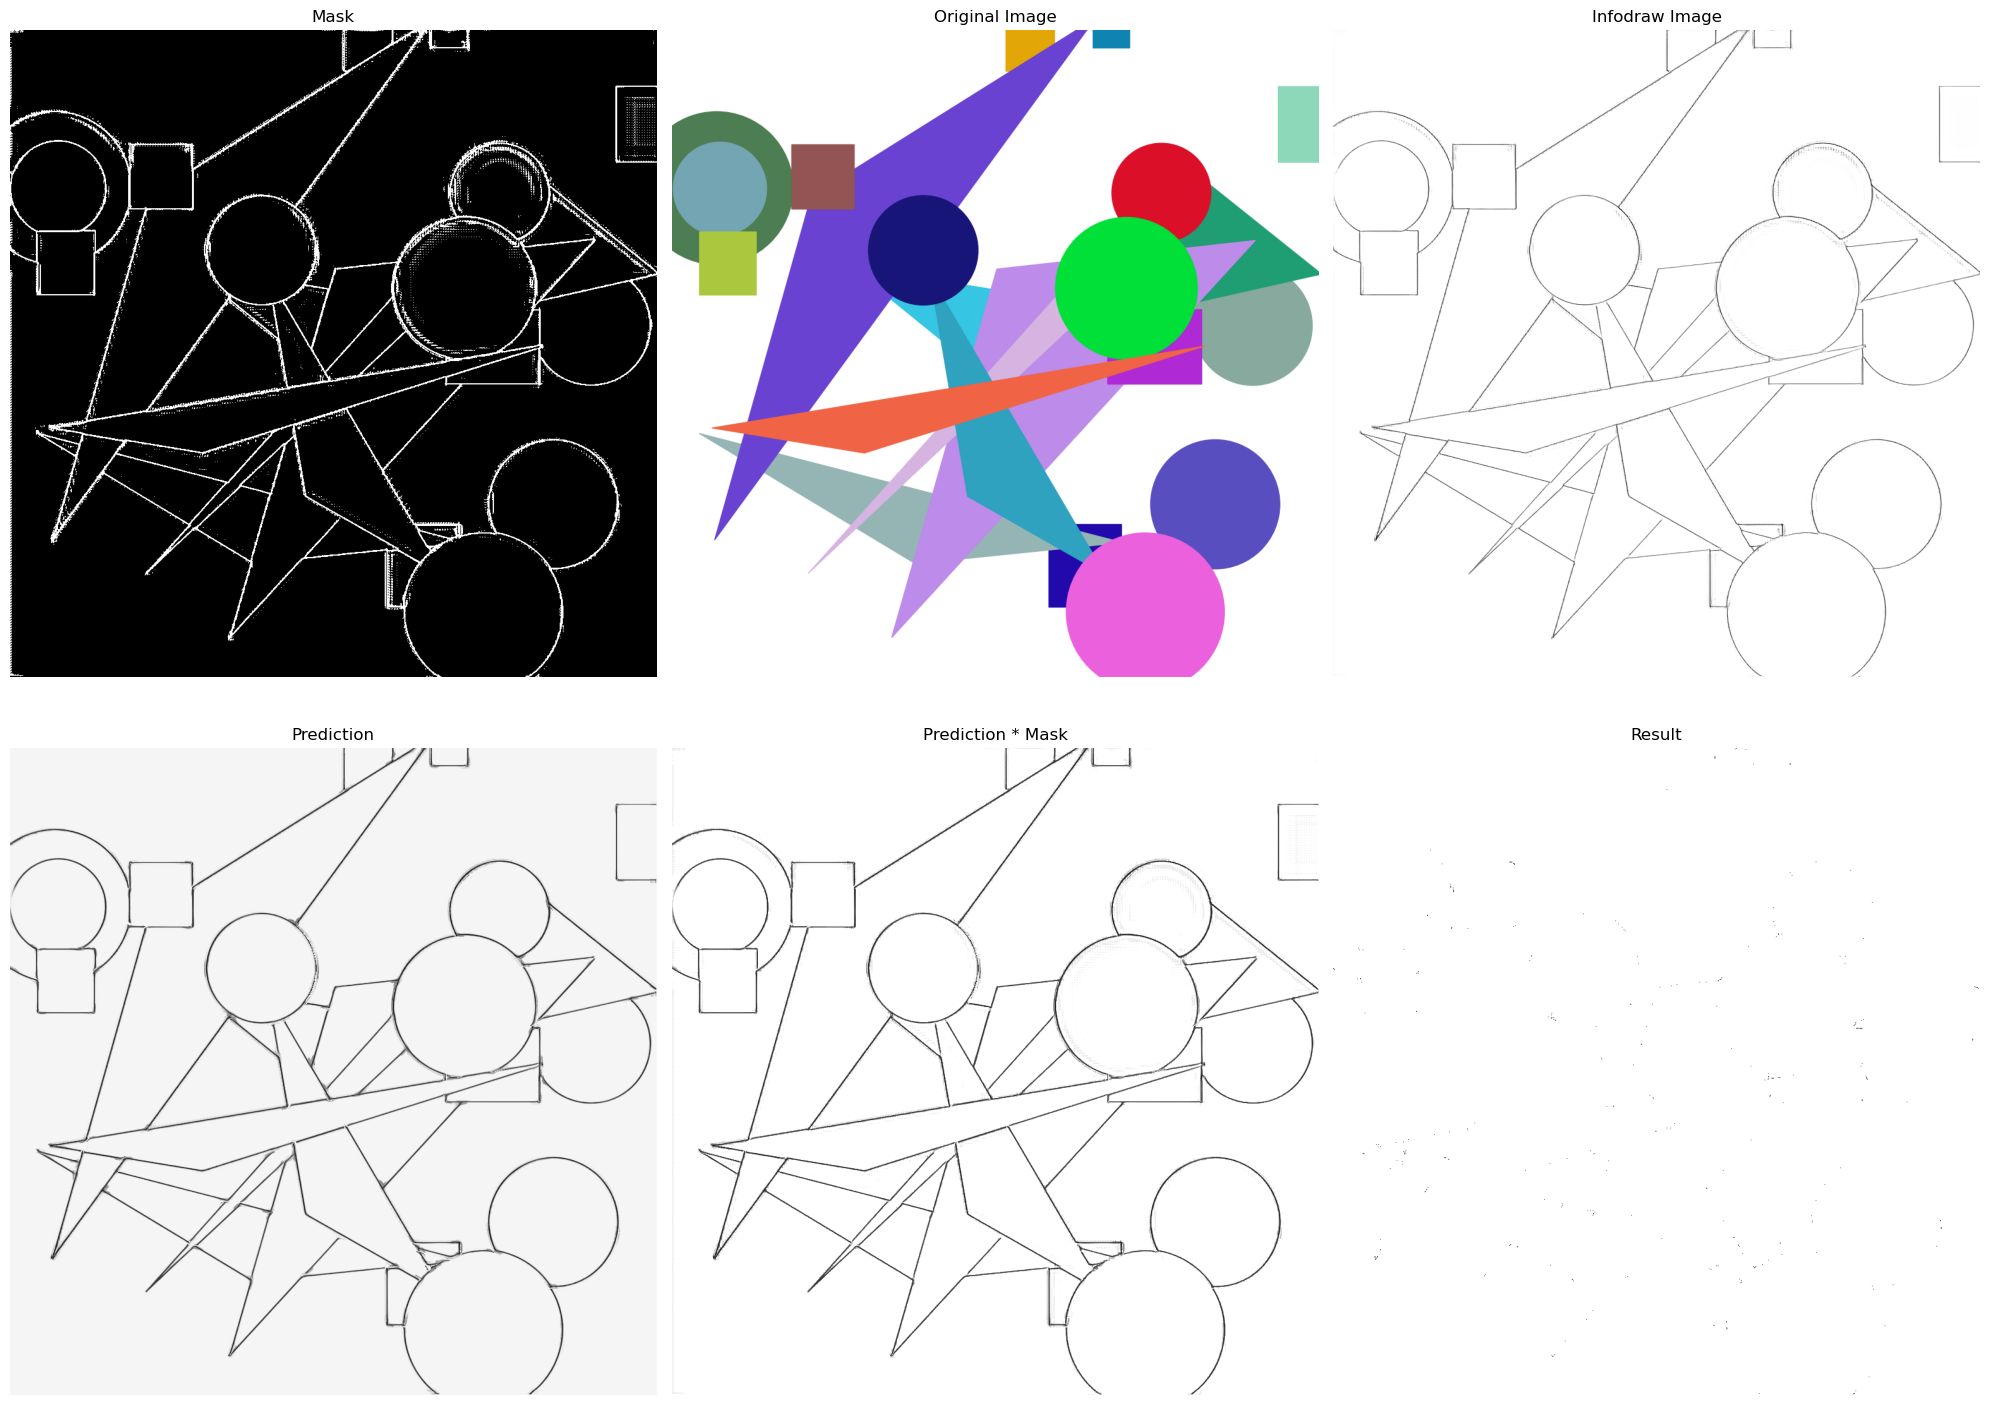

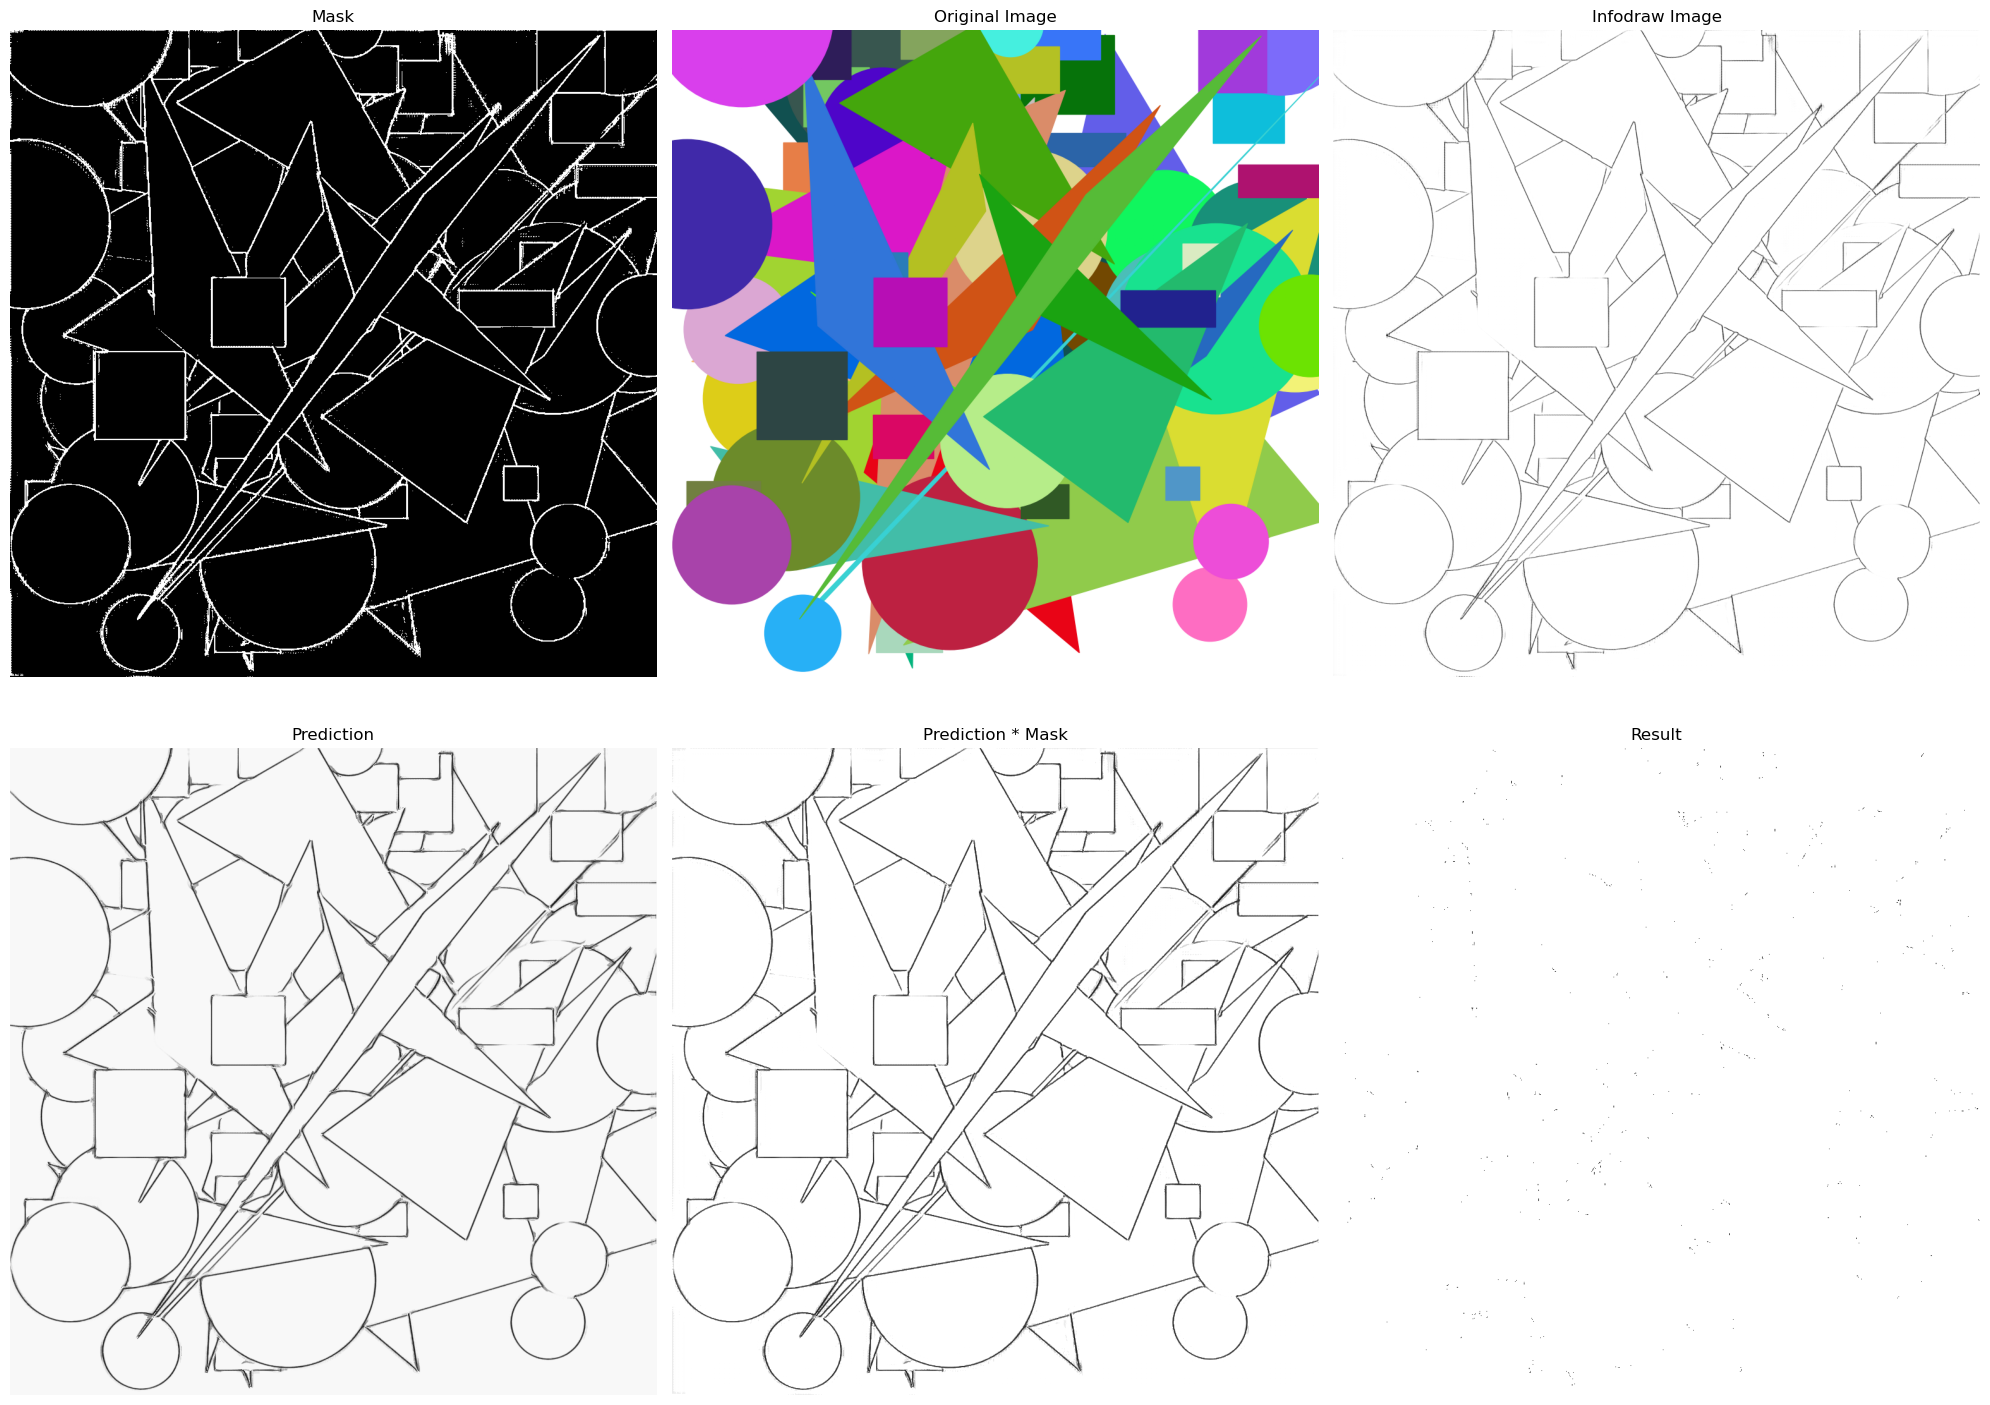

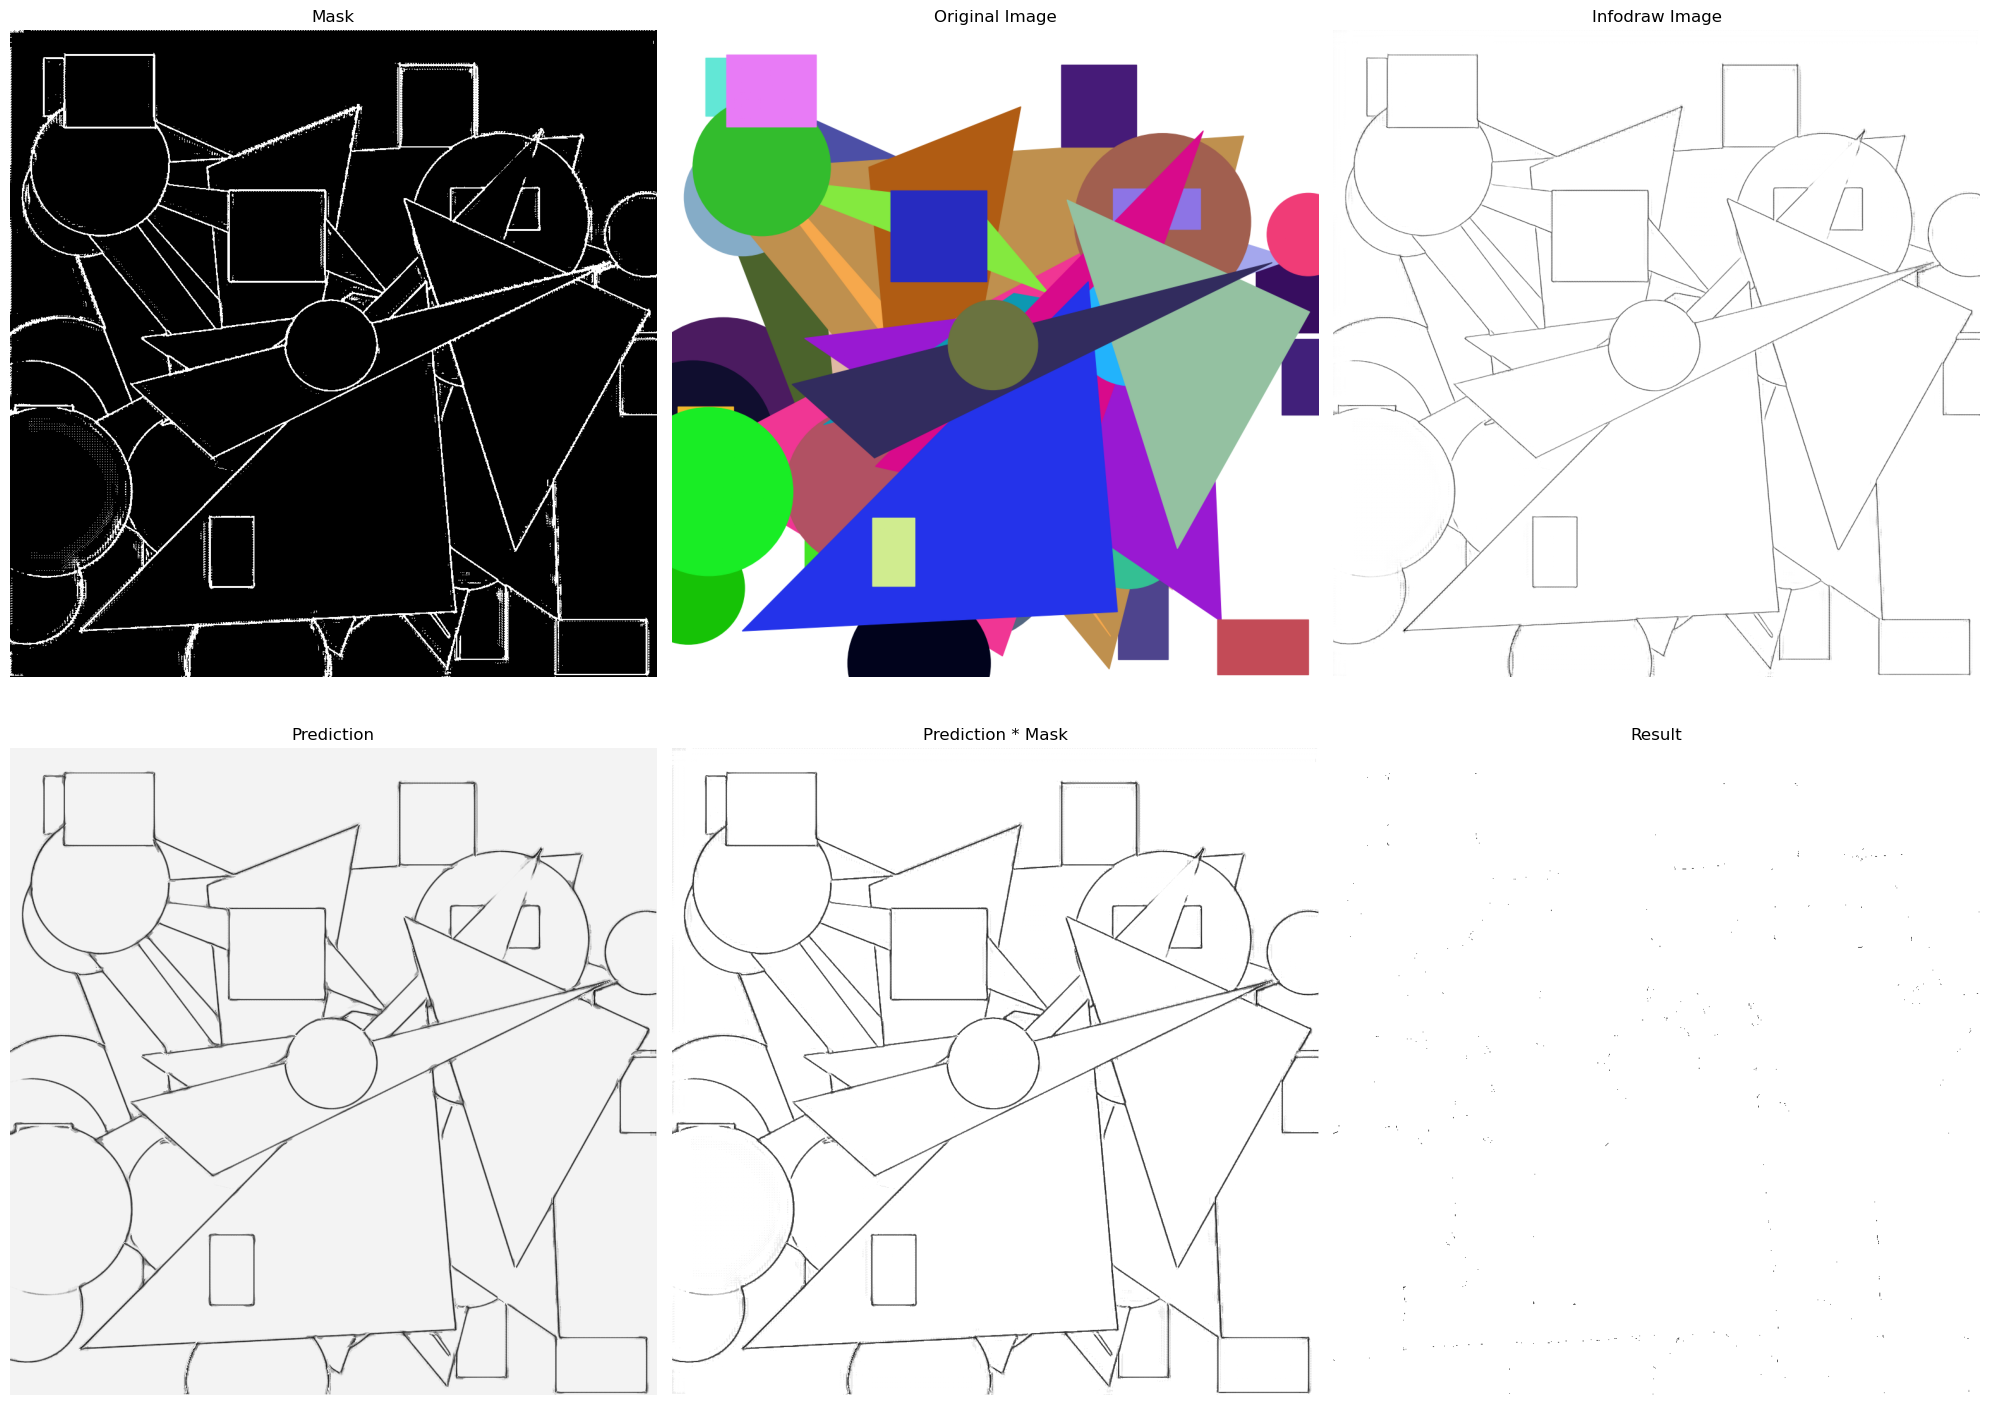

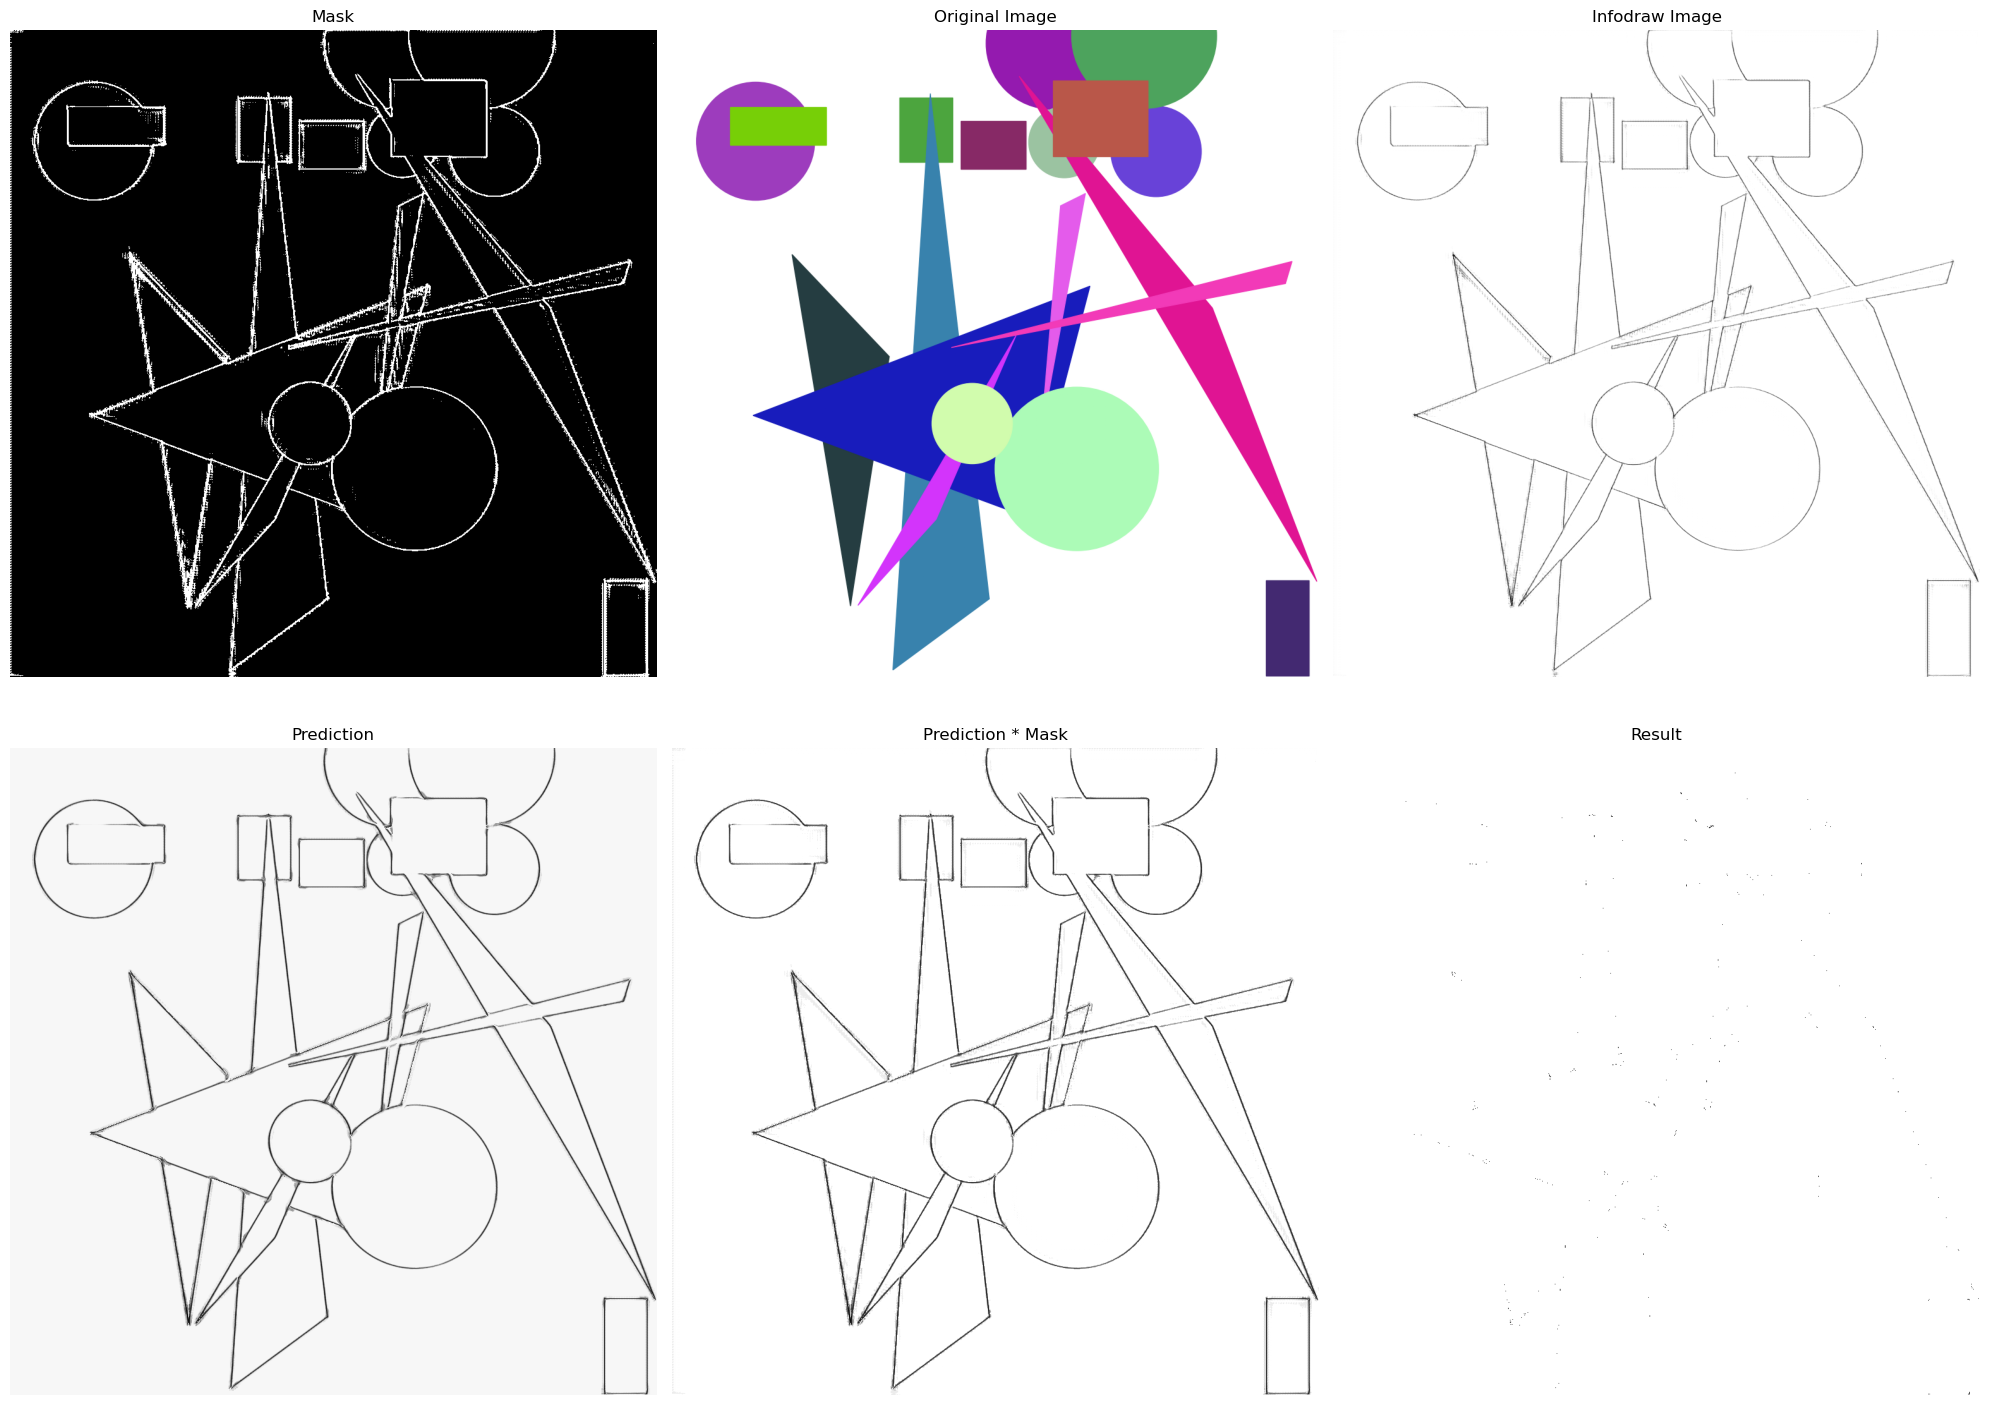

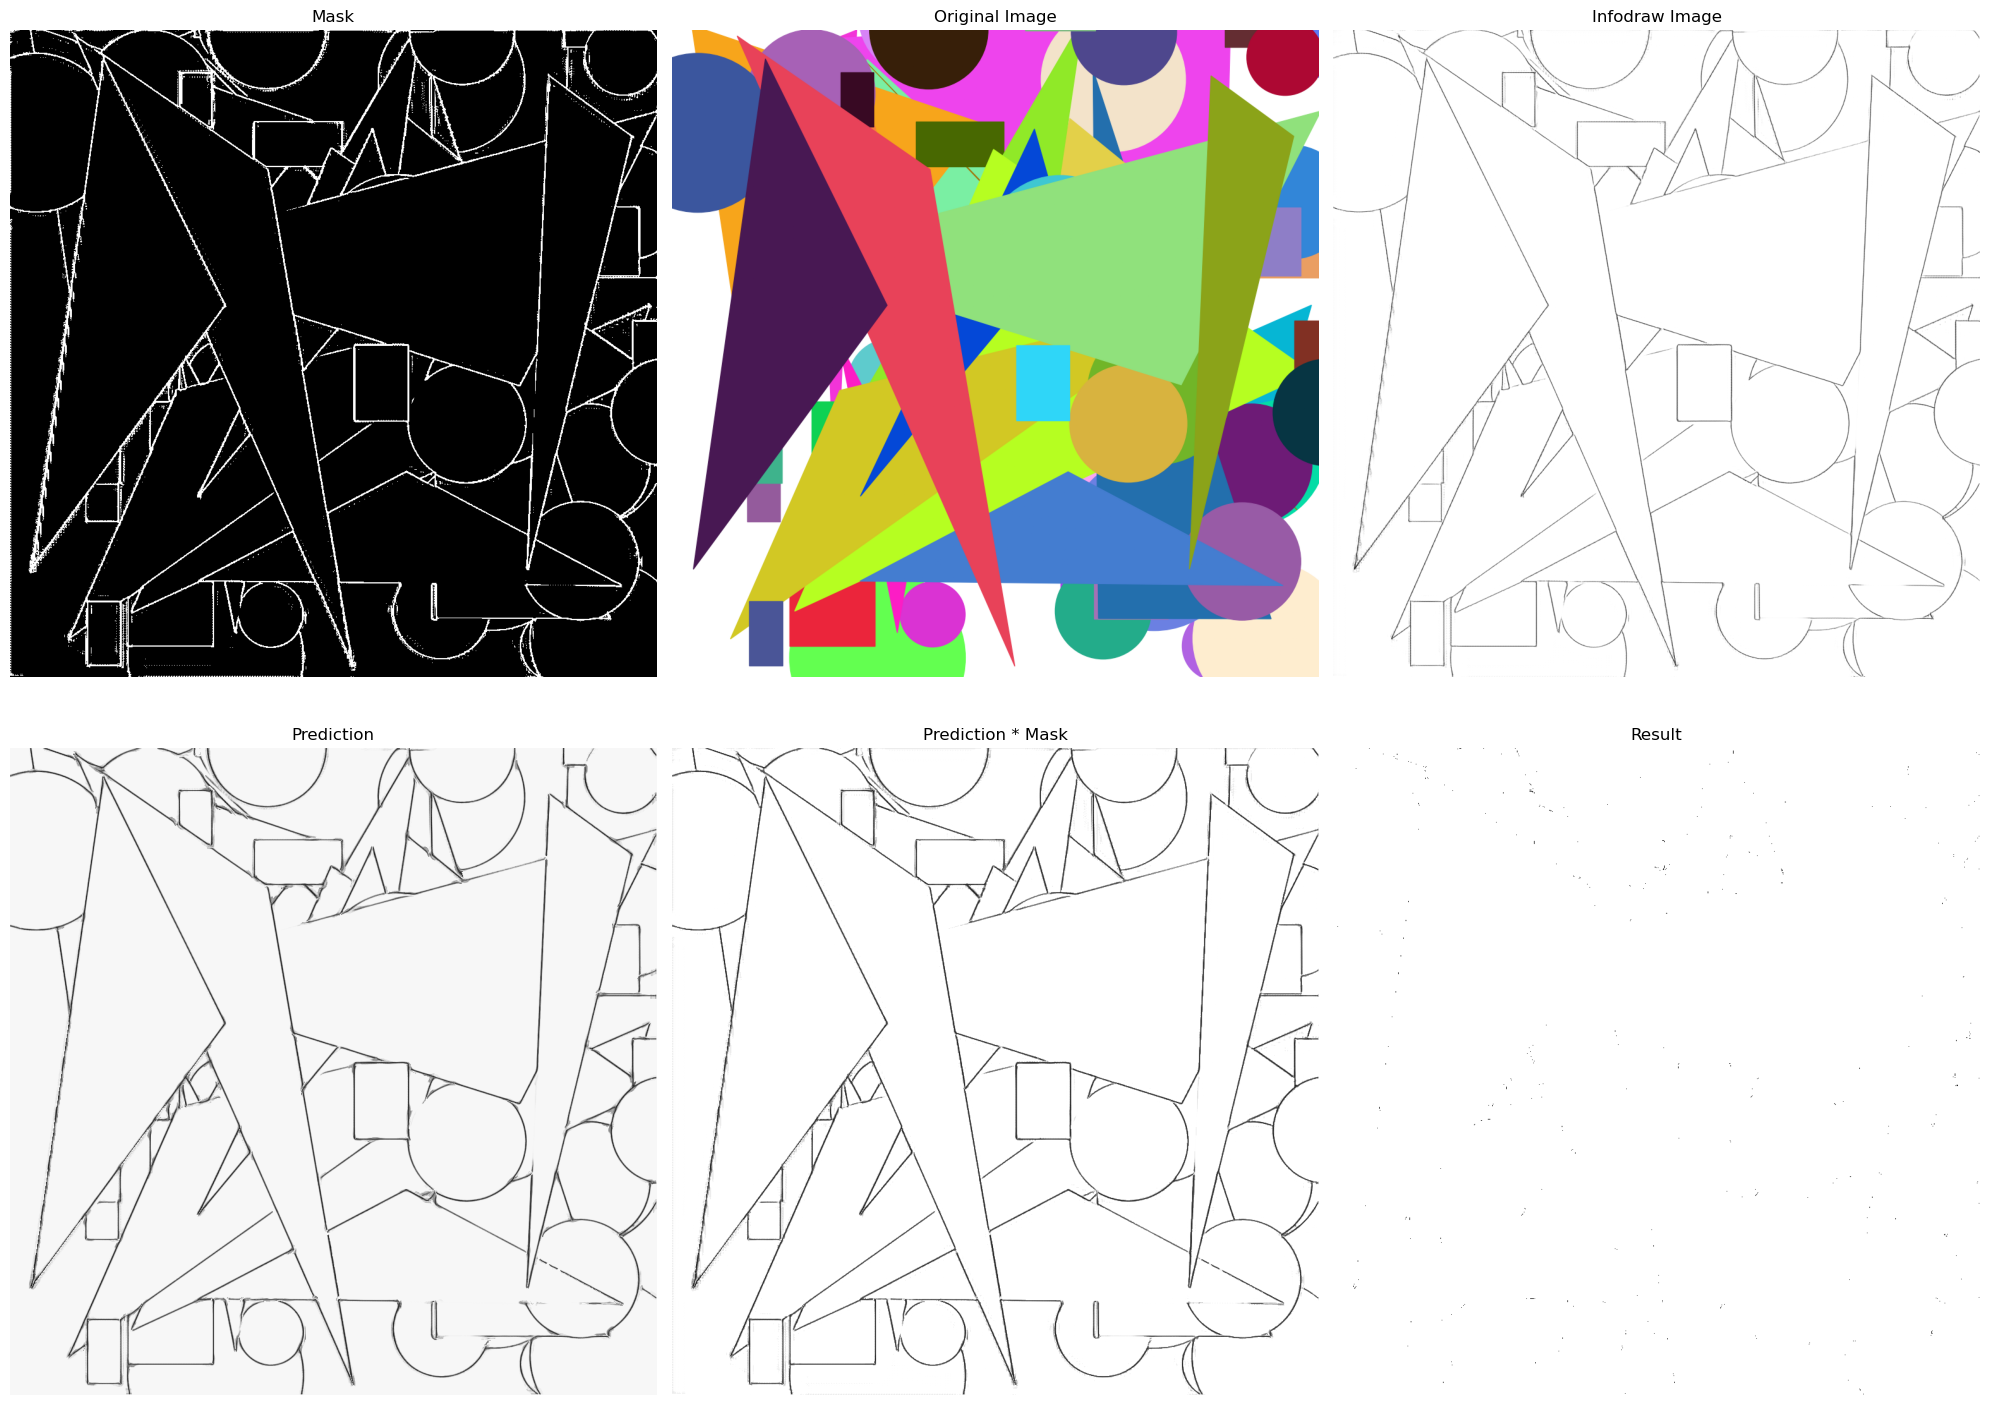

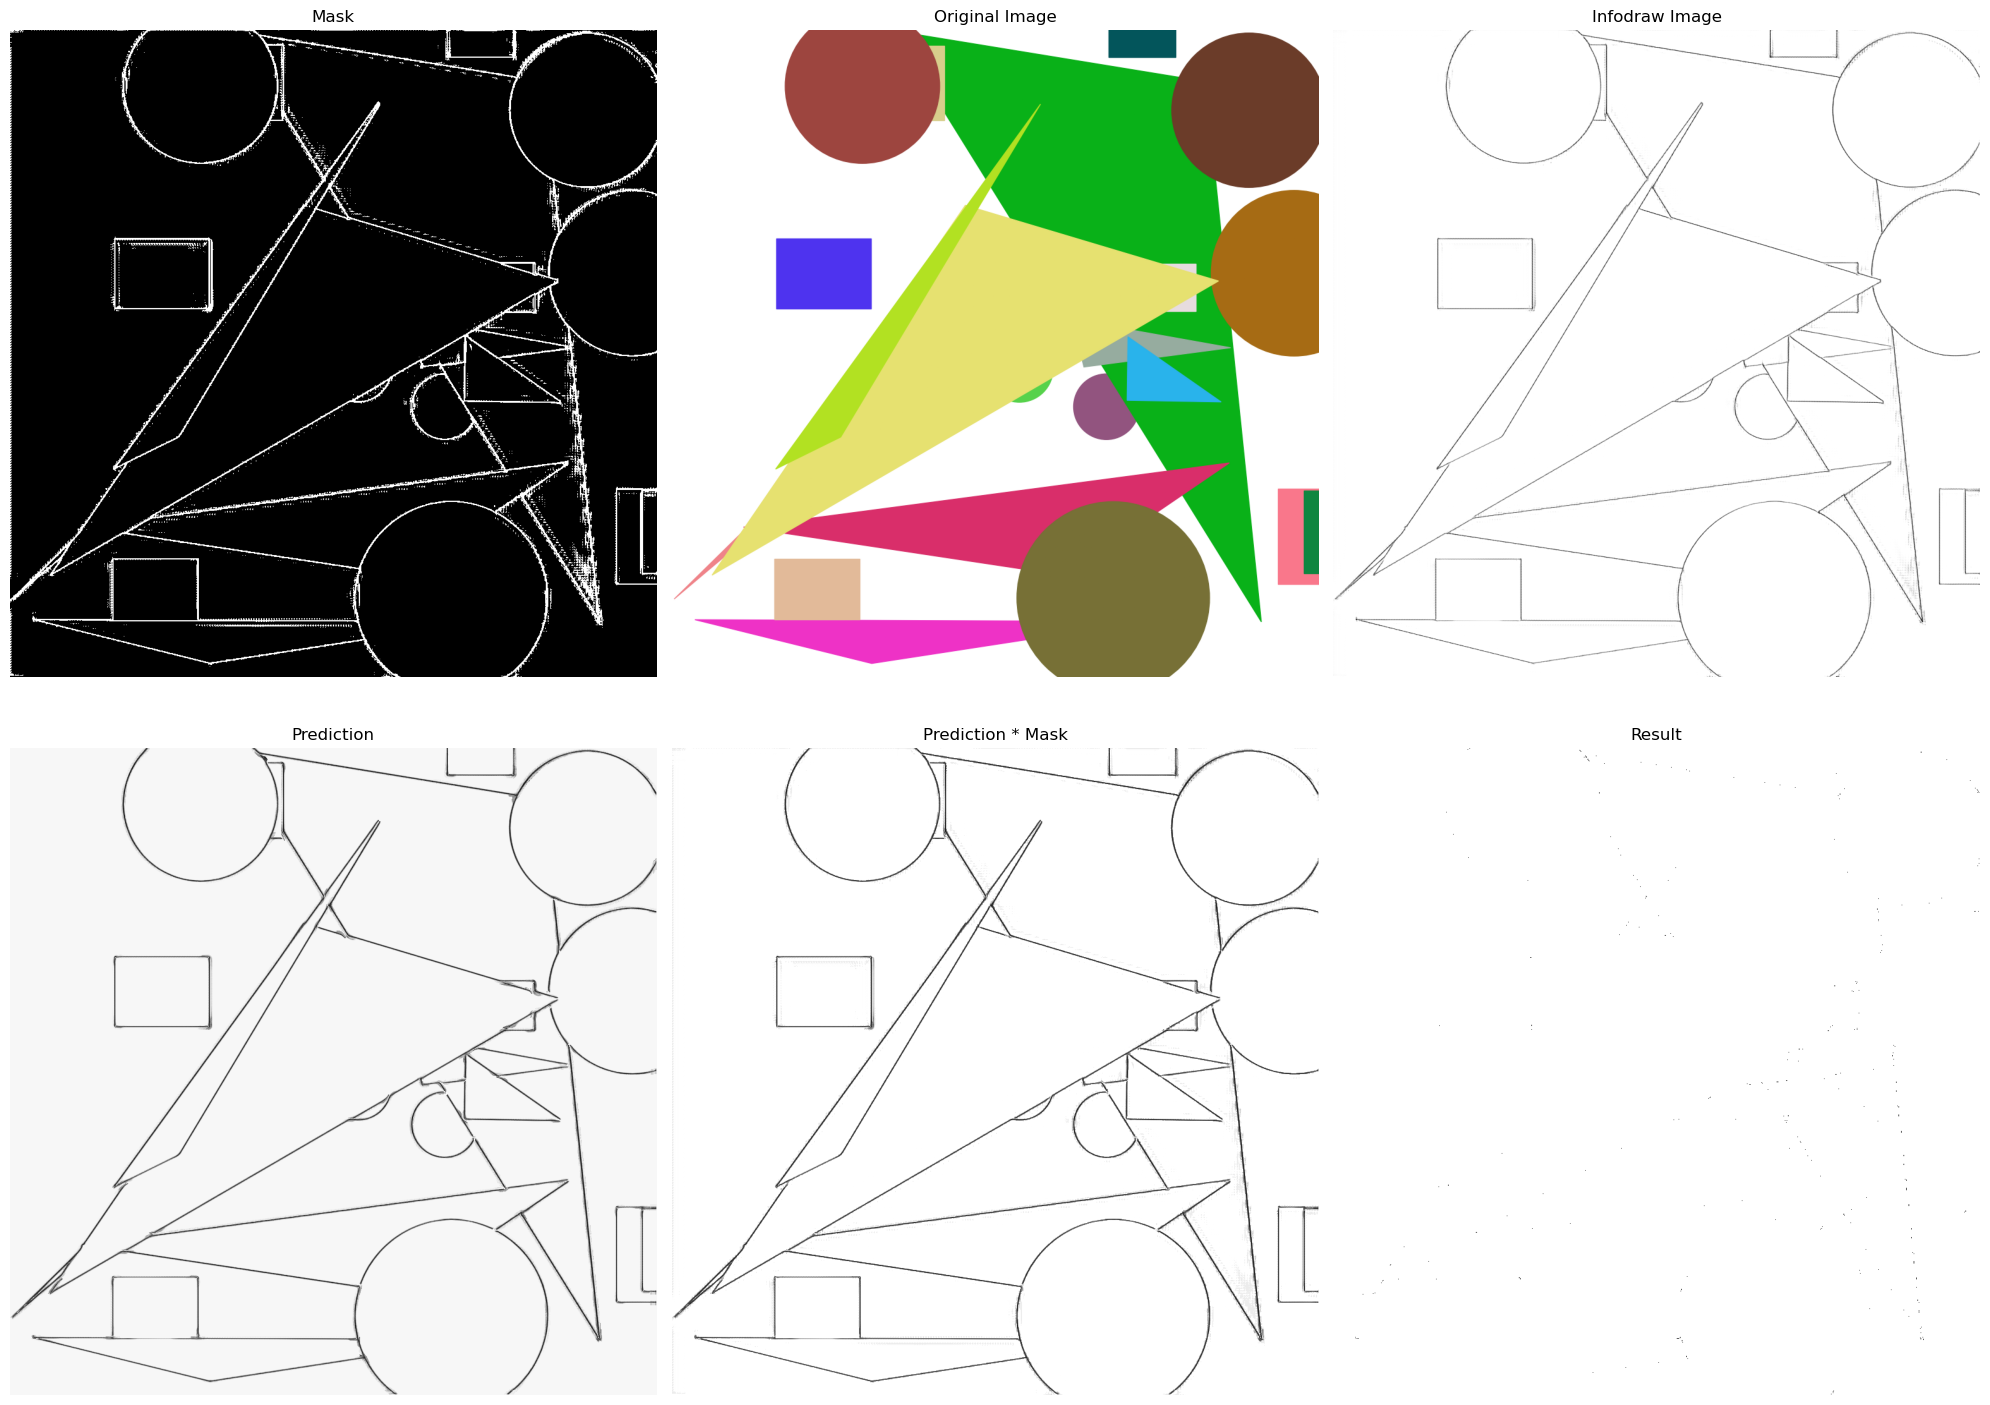

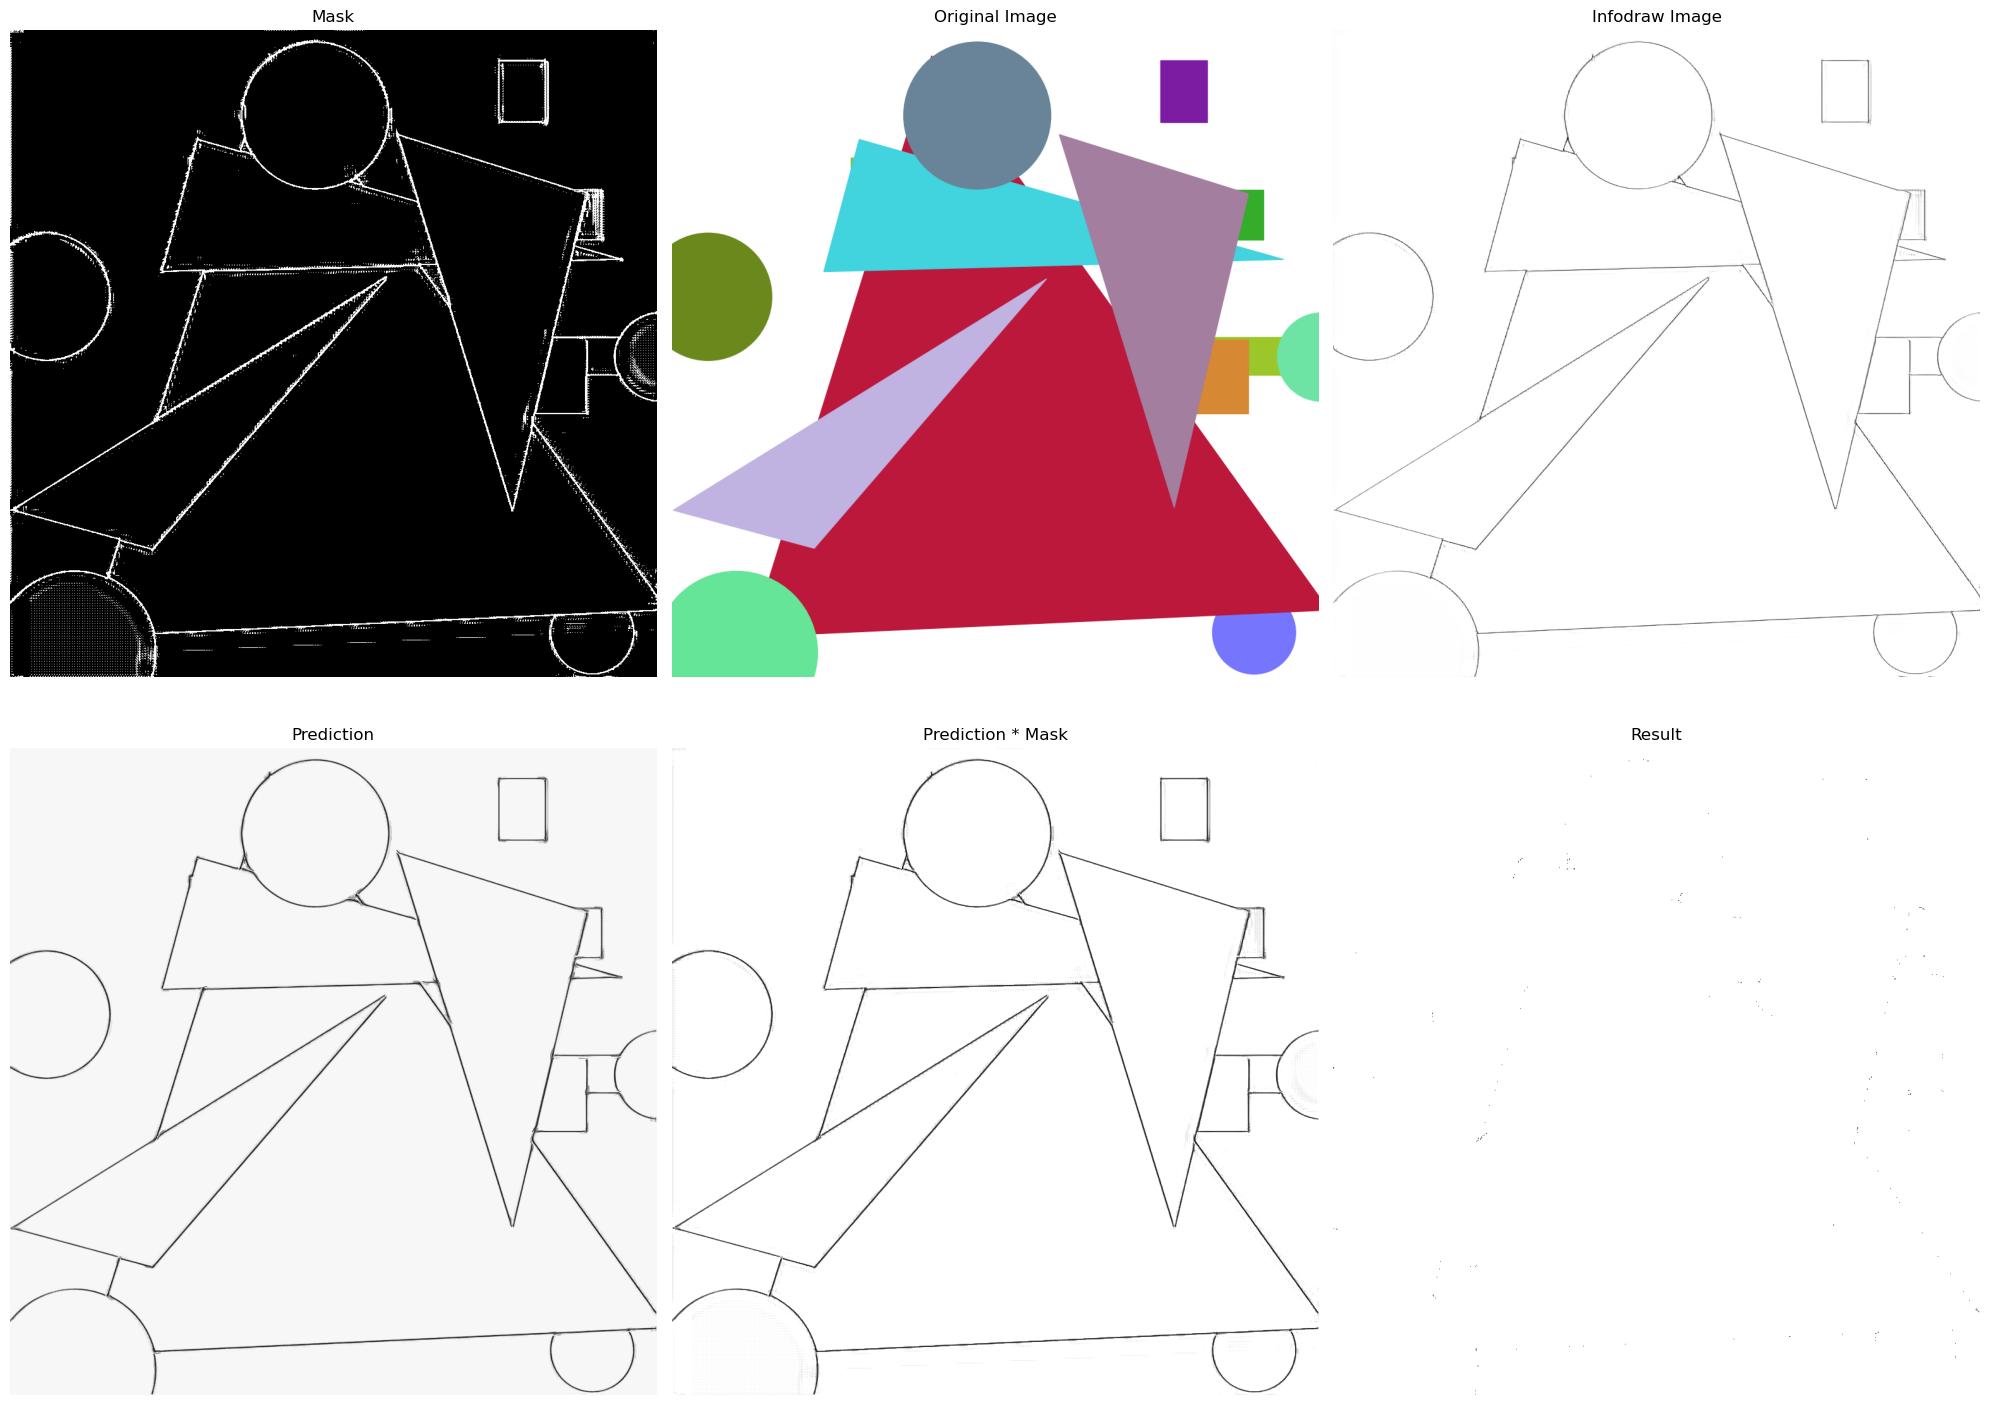

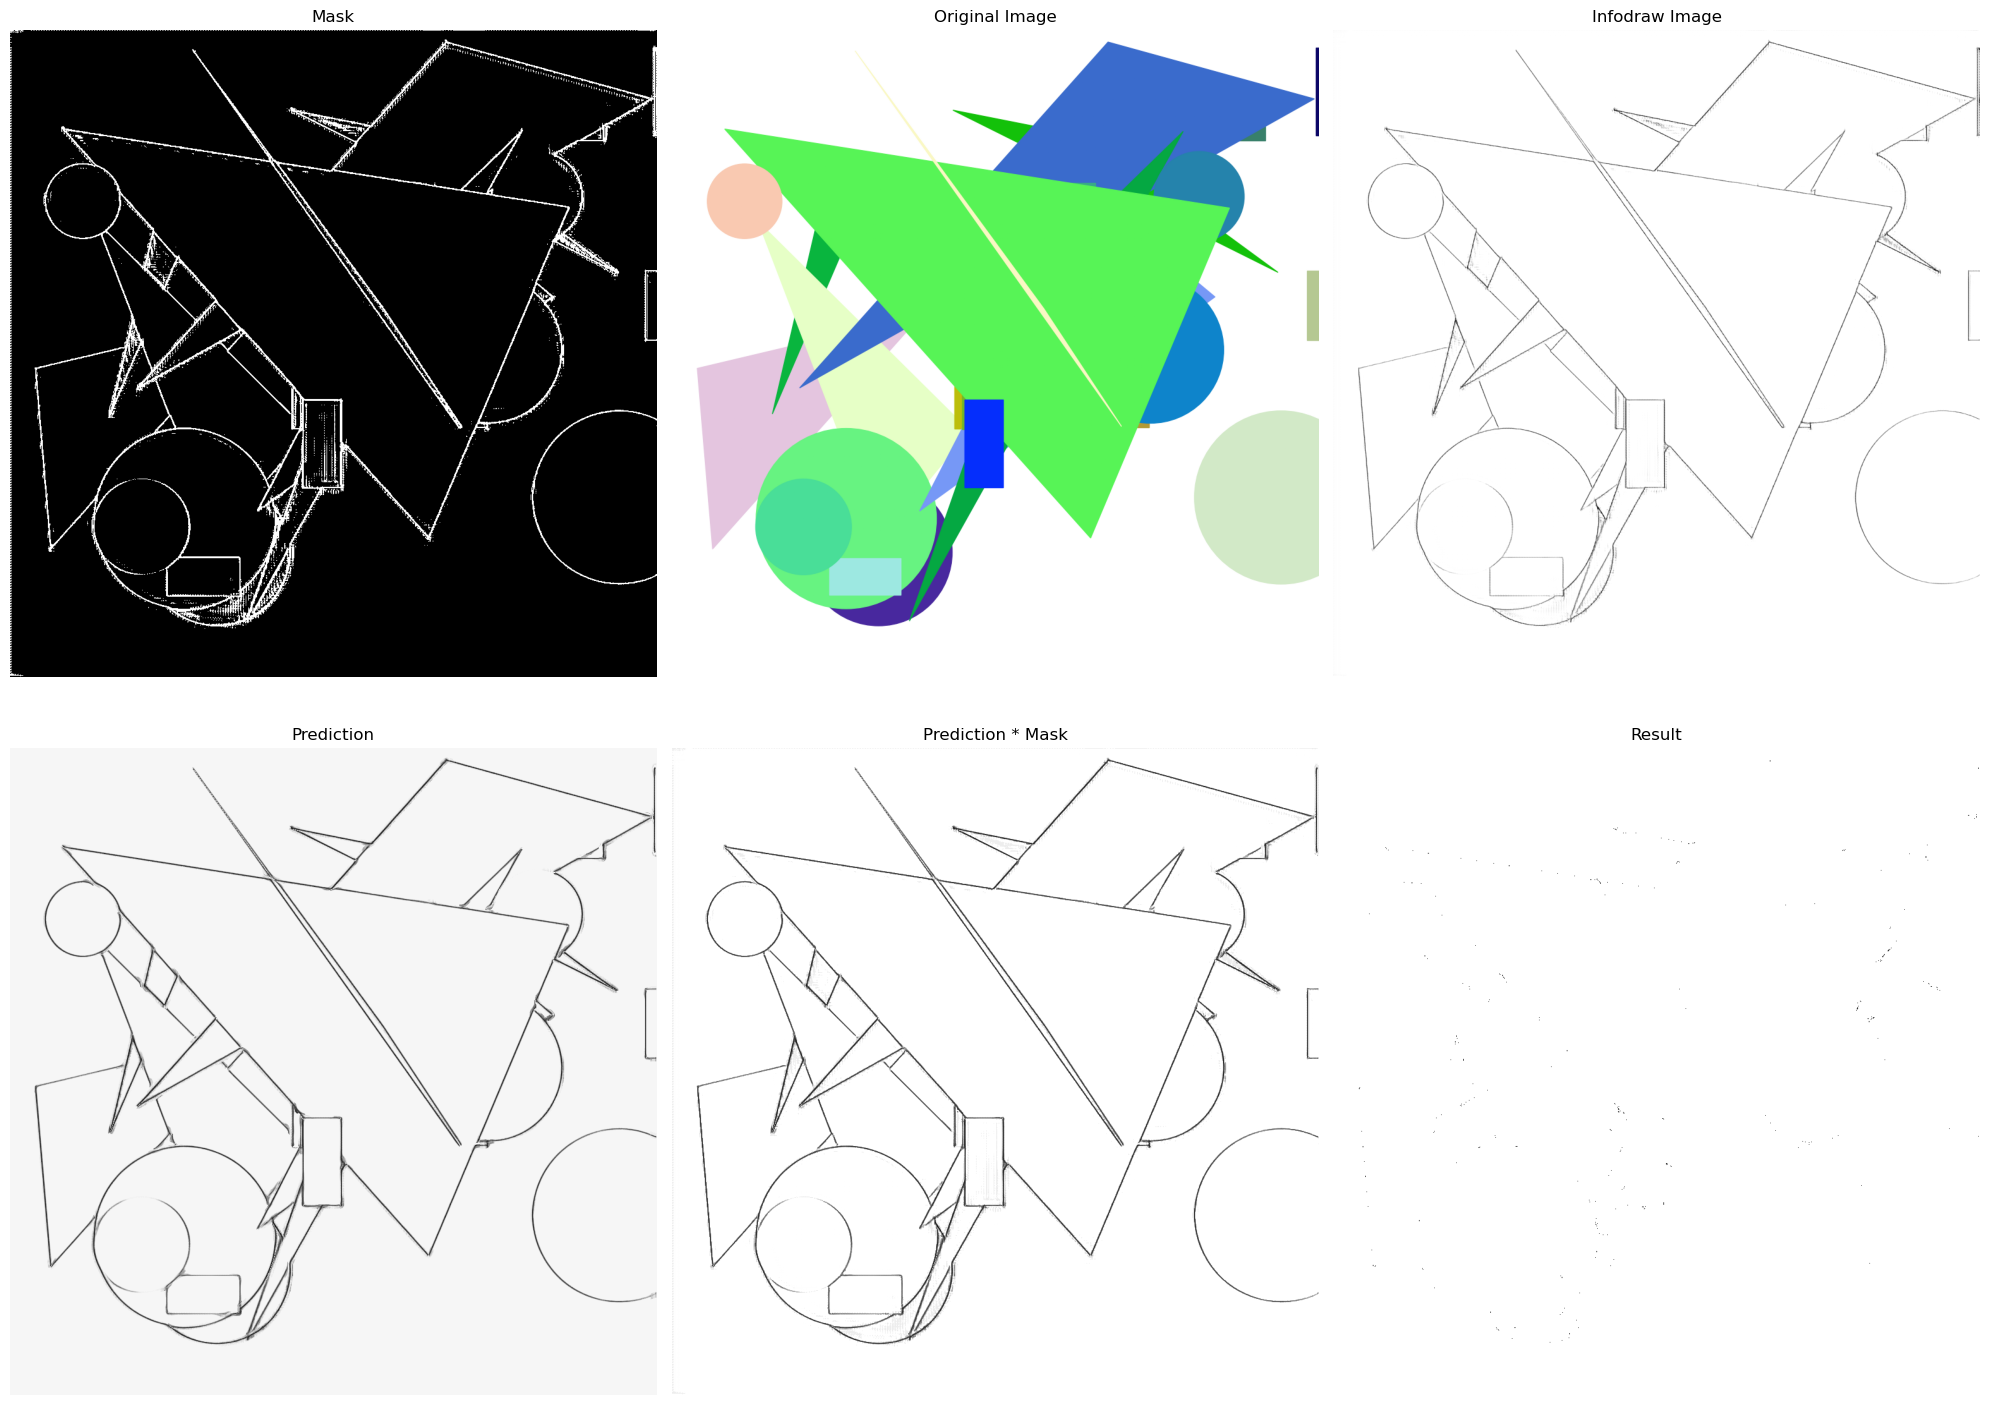

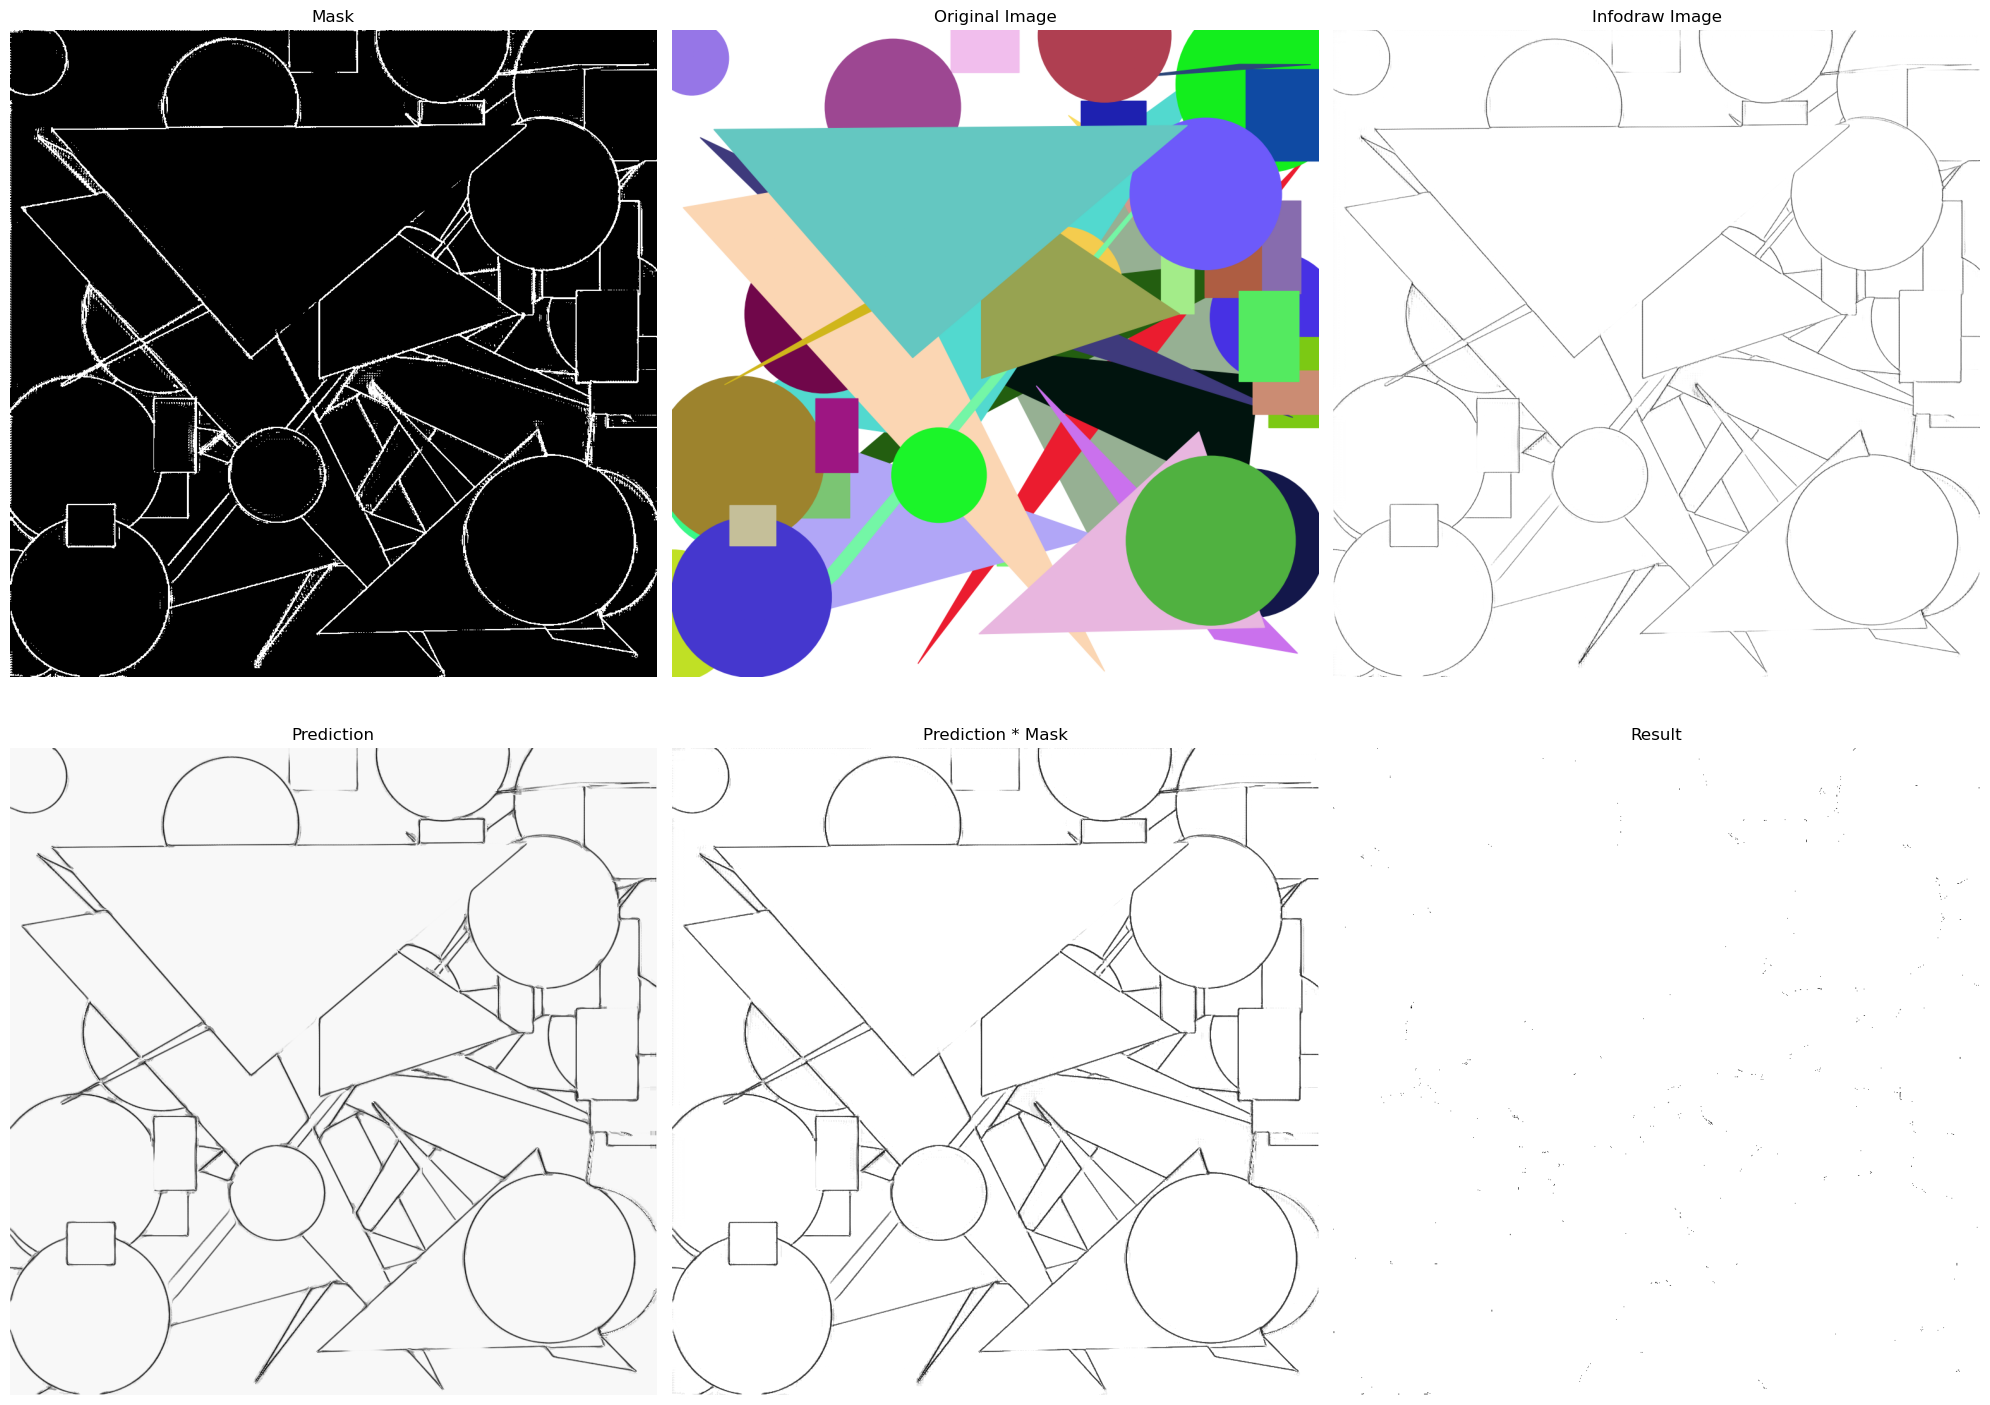

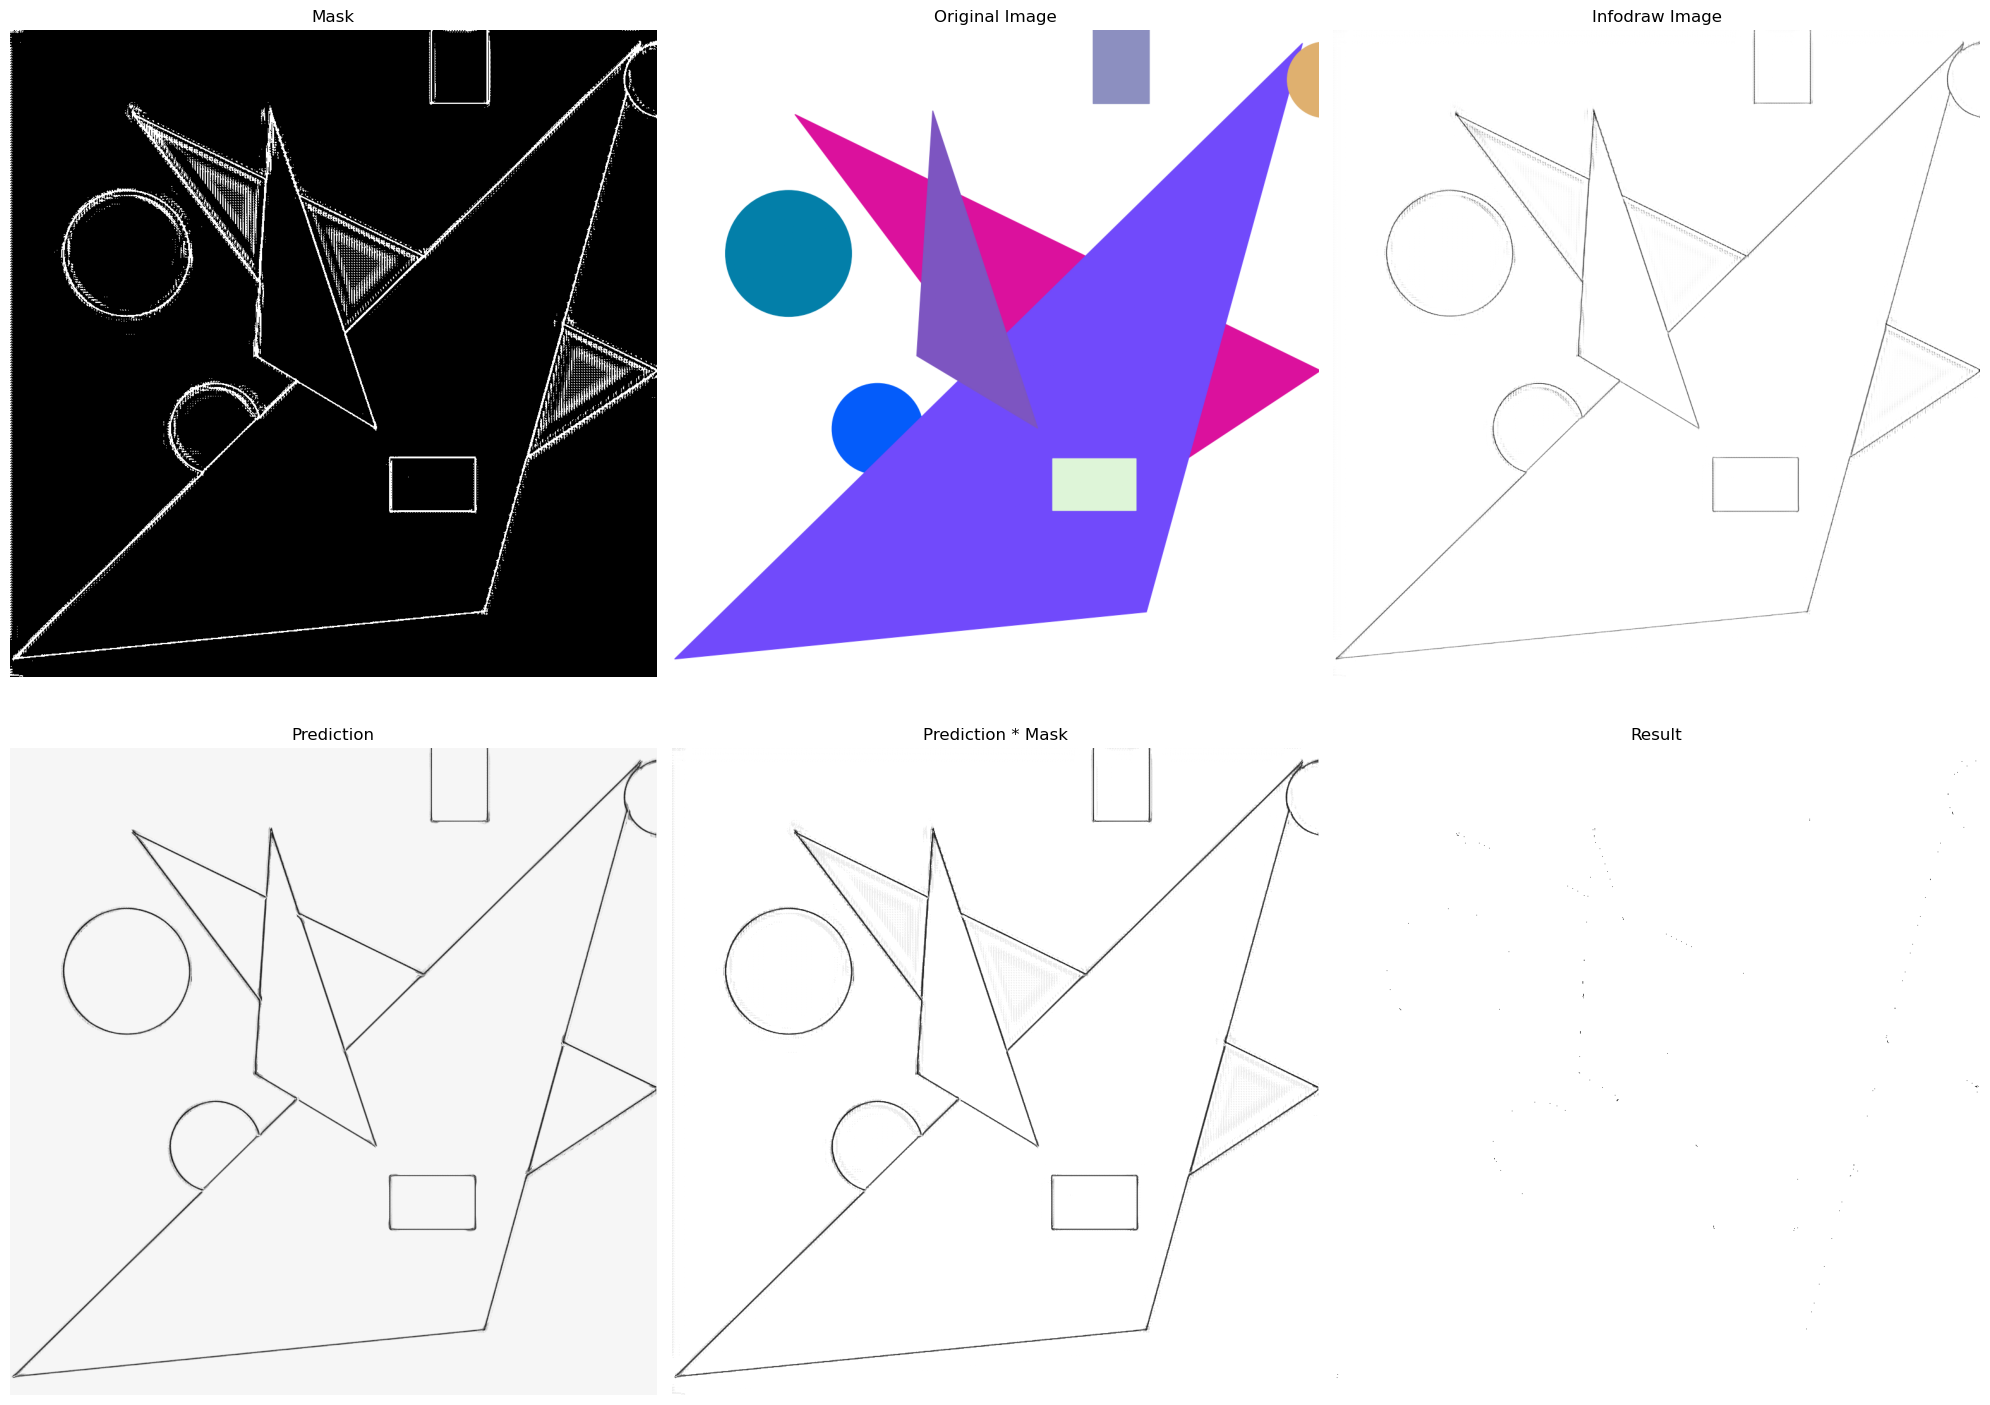

In [26]:
for index in range(15):
    vtf, vtf_path = vtfs[index], vtf_paths[index]
    img, img_path = imgs[index], img_paths[index]
    infodraw, infodraw_path = infodraws[index], infodraw_paths[index]

    print(f"{vtf_path=}, {img_path=}, {infodraw_path=}")

    vtf = torch.tensor(vtf).to('cuda').unsqueeze(0)
    img = torch.tensor(img).to('cuda').unsqueeze(0)
    infodraw = torch.tensor(infodraw).to('cuda').unsqueeze(0)

    print(f"vtf : {torch.min(vtf), torch.max(vtf)}")
    print(f"img : {torch.min(img), torch.max(img)}")
    print(f"{vtf.shape=}, {img.shape=}, {infodraw.shape=}")

    with torch.no_grad():
        pred, _, result = model.inference(vtf=vtf, img=img, infodraw=infodraw)

    result = result.cpu().numpy().squeeze()

    cv2.imwrite(f"test.png", np.array(result, dtype=np.float32) * 255)

    vtf = vtf.cpu().squeeze().numpy()
    img = img.cpu().squeeze().numpy()
    infodraw = infodraw.cpu().squeeze().numpy()
    pred = pred.cpu().squeeze().numpy()

    mask = infodraw < 0.99

    fig, axs = plt.subplots(2, 3, figsize=(20, 15))

    # Subplot 1: Mask
    axs[0, 0].imshow(mask, cmap='gray')
    axs[0, 0].axis('off')
    axs[0, 0].set_title('Mask')

    # Subplot 2: Original Image
    axs[0, 1].imshow(img.transpose((1, 2, 0)))
    axs[0, 1].axis('off')
    axs[0, 1].set_title('Original Image')

    # Subplot 3: Infodraw Image
    axs[0, 2].imshow(infodraw, cmap='gray')
    axs[0, 2].axis('off')
    axs[0, 2].set_title('Infodraw Image')

    # Subplot 4: Prediction
    axs[1, 0].imshow(pred, cmap='gray')
    axs[1, 0].axis('off')
    axs[1, 0].set_title('Prediction')

    # Subplot 5: Prediction with Mask
    axs[1, 1].imshow(pred*mask + ~mask*infodraw , cmap='gray')
    axs[1, 1].axis('off')
    axs[1, 1].set_title('Prediction * Mask')

    # Subplot 7: Final Result
    axs[1, 2].imshow(result, cmap='gray')
    axs[1, 2].axis('off')
    axs[1, 2].set_title('Result')


    plt.tight_layout()
    plt.savefig(f"result_{index}.png", dpi=300, bbox_inches='tight')